# Gather

In [1]:
#load necessary packages

import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#load downloaded twitter archive csv file 

dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# preview file 

dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = dogs.tweet_id.values
len(tweet_ids)

#Create empty list to fill with successful tweet data collections
tweet_info = []

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            tweet_info.append(tweet._json)
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# Create dataframe containing tweet id, retweet count and favorite count 

tweet_df = []

for tweet in tweet_info:
    tweet_df.append({'tweet_id':tweet['id'], 
                        'retweets':tweet['retweet_count'],
                        'favorites':tweet['favorite_count']})

In [ ]:
#Convert to numpy array 
tweet_df = np.array(tweet_df)

#Covert numpy array to DataFrame
tweet_df = pd.DataFrame.from_records(tweet_df)

#Preview DataFrame
tweet_df.head()

In [ ]:
#Save DataFrame to csv file for later use 
tweet_df.to_csv('tweet_info.csv', index=False)

In [4]:
#Load DataFrame and preview to ensure the file was concerted properly 
tweet_df = pd.read_csv('tweet_info.csv')

tweet_df.head()

,favorites,retweets,tweet_id
0,37899,8278,892420643555336193
1,32556,6115,892177421306343426
2,24514,4051,891815181378084864
3,41252,8420,891689557279858688
4,39424,9120,891327558926688256


In [4]:
#Download image predictions file
import urllib.request

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tsv = urllib.request.urlopen(url).read() 

with open(url.split('/')[-1], 'wb') as fx: 
    fx.write(tsv)

In [5]:
#Open image-predictions.tsv as a pandas DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
#Preview image predictions DataFrame
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Assess

In [8]:
#View each DataFrame 
dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
tweet_df

,favorites,retweets,tweet_id
0,37899,8278,892420643555336193
1,32556,6115,892177421306343426
2,24514,4051,891815181378084864
3,41252,8420,891689557279858688
4,39424,9120,891327558926688256
5,19820,3034,891087950875897856
6,11585,2007,890971913173991426
7,63953,18368,890729181411237888
8,27230,4167,890609185150312448
9,31242,7187,890240255349198849


In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic Assessment

In [11]:
#Preview twitter archive csv to look for any issues
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
#Obtain info on datatypes and possible missing values 
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#Preview data collected with API 
tweet_df.head()

,favorites,retweets,tweet_id
0,37899,8278,892420643555336193
1,32556,6115,892177421306343426
2,24514,4051,891815181378084864
3,41252,8420,891689557279858688
4,39424,9120,891327558926688256


In [14]:
#Obtain info on datatypes and possible missing values 
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorites    2340 non-null int64
retweets     2340 non-null int64
tweet_id     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [16]:
#Obtain info on datatypes and possible missing values 
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues

• Unoriginal tweets found (replies and retweets)

• +0000 at the end of each timestamp (unnecessary data)

• Some tweets do not have images 

• Uncommon numerator values -> check accuracy

• Uncommon denominator values -> check accuracy

• Datatypes for tweet IDs should be strings

• Non-breed image predictions (i.e. paper towel, chair, etc.)

• 'None' listed in dog stage instead of NaN

•  Missing favorite and retweet counts

•  Multiple dogs present in various tweets

•  Non dog names in name column

### Tidiness Issues

• Multiple columns for dog 'stage'

• Multiple DataFrames

# Clean

In [8]:
#Create copy of original DataFrames for reference 
dogs_clean = dogs.copy()
tweets_clean = tweet_df.copy()
image_clean = image_predictions.copy()

### Define

TIDINESS

• Combine dog stage columns ('doggo', 'floofer', 'pupper', and 'puppo') from dogs DataFrame into a single column titled 'stage'

• Use pd.merge function to combine DataFrames to reduce redundancy and aid analysis

QUALITY

• Correct stage labels in stage column using .replace() for clarity in visual

• Remove unoriginal tweets found (replies and retweets) using drop function

• Drop unnecessary reply and retweet columns using drop function

• Remove +0000 at the end of each timestamp using string slicing

• Remove tweets that do not have images using the .dropna() function on the jpg_url column

• Replace innacurate numerator values in rating_numerator column

• Replace innacurate denominator values in rating_denominator column

• Change datatype for tweet IDs from int to string

• Delete rows with missing favorite and retweet counts using .drop()

• Use .drop function to remove rows with tweets containing multiple dogs as identified while verifying denominators

• Identify non-name values in the dog name column using .lower()

### Define

Combine dog stage columns ('doggo', 'floofer', 'pupper', and 'puppo') from dogs DataFrame into a single column titled 'stage'

### Code

In [9]:
#Combine 4 dog stage columns into one
dogs_clean['stage'] = dogs_clean.doggo + dogs_clean.floofer + dogs_clean.pupper + dogs_clean.puppo

#Check resulting values
dogs_clean['stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [10]:
# Convert resulting column 'stage' from int to str
 
dogs_clean['stage'] = dogs_clean.stage.astype(str)

In [11]:
# Replace combined column values to proper labels
dogs_clean['stage'].replace(to_replace='NoneNoneNoneNone', value='none', inplace=True)
dogs_clean['stage'].replace(to_replace='doggoNoneNoneNone', value='doggo', inplace=True)
dogs_clean['stage'].replace(to_replace='NoneNonepupperNone', value='pupper', inplace=True)
dogs_clean['stage'].replace(to_replace='NoneNoneNonepuppo', value='puppo', inplace=True)
dogs_clean['stage'].replace(to_replace='doggoNonepupperNone', value='doggo,pupper', inplace=True)
dogs_clean['stage'].replace(to_replace='NoneflooferNoneNone', value='floofer', inplace=True)
dogs_clean['stage'].replace(to_replace='doggoflooferNoneNone', value='doggo,floofer', inplace=True)
dogs_clean['stage'].replace(to_replace='doggoNoneNonepuppo', value='doggo,puppo', inplace=True)

In [12]:
#Drop doggo, floofer, puppo, and pupper columns in dogs dataframe
dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [13]:
# Check values in 'stage' column
dogs_clean['stage'].value_counts()

none             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [23]:
# Ensure original columns dropped

dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Define

Use pd.merge function to combine DataFrames to reduce redundancy and aid analysis

### Code

In [14]:
# Combine dogs_clean and tweets_clean DataFrames
result = pd.merge(dogs_clean, tweets_clean, how='outer', on=['tweet_id', 'tweet_id'])

# Combine resulting DataFrame with image_clean DataFrame
full_data = pd.merge(result, image_clean, how='outer', on=['tweet_id', 'tweet_id'])

### Test

In [27]:
# Confirm merge

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
favorites                     2340 non-null float64
retweets                      2340 non-null float64
jpg_url                       2075 non-null object
img_num                       

### Define

Remove unoriginal tweets found (replies and retweets) using drop function

### Code

In [15]:
# Delete unoriginal tweets (reply tweets)
full_data.drop(full_data[full_data.in_reply_to_status_id > 0].index, inplace=True)

# Delete unoriginal tweets (retweeted tweets)
full_data.drop(full_data[full_data.retweeted_status_id > 0].index, inplace=True)

### Test

In [29]:
# Confirm deleted values 

full_data['in_reply_to_status_id'].value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [30]:
full_data['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

### Define

Drop unnecessary reply and retweet columns using drop function

### Code

In [16]:
# Drop irrelevant reply and retweeted columns 

drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
full_data.drop(drop_columns, inplace=True, axis=1)

### Test

In [32]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 2097 non-null object
favorites             2095 non-null float64
retweets              2095 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-

### Define

Remove +0000 at the end of each timestamp using string slicing

### Code

In [17]:
full_data['timestamp']= full_data['timestamp'].str.rstrip('+0000')

### Test

In [34]:
full_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,37899.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,32556.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,24514.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,41252.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,39424.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Define

Remove tweets that do not have images using .dropna() function on the jpg_url column

### Code

In [18]:
full_data.dropna(subset=['jpg_url'], inplace=True)

### Test

In [39]:
full_data.query('jpg_url == "np.nan"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define

Replace innacurate numerator values in rating_numerator column

### Code

In [19]:
# Extract numerators from text using regex pattern to check for accuracy 

full_data['rating_numerator_correct'] = np.nan

correct_numerator = full_data.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
full_data['rating_numerator_correct'] = correct_numerator

#SOURCE: https://knowledge.udacity.com/questions/33009

In [41]:
full_data['rating_numerator_correct'].value_counts()

12       446
10       417
11       392
13       253
9        150
8         95
7         52
14        33
6         32
5         32
3         19
4         16
2          9
1          5
11.27      1
121        1
13.5       1
44         1
1776       1
60         1
144        1
9.75       1
50         1
420        1
84         1
24         1
11.26      1
80         1
0          1
204        1
88         1
165        1
99         1
45         1
Name: rating_numerator_correct, dtype: int64

In [20]:
# Convert numerator columns to from int to float 

full_data['rating_numerator'] = full_data.rating_numerator.astype(float)

full_data['rating_numerator_correct'] = full_data.rating_numerator_correct.astype(float)

In [21]:
# Identify possible numerator errors

full_data['numerator_match'] = np.where((full_data['rating_numerator'] == full_data['rating_numerator_correct']), 'Yes', 'No')

full_data['numerator_match'].value_counts()

Yes    1967
No        4
Name: numerator_match, dtype: int64

In [44]:
# Run query to identify the rows that contain the possible numerator errors

full_data.query('numerator_match == "No"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator_correct,numerator_match
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10,Bella,none,44940.0,...,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,13.50,No
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,none,19368.0,...,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,9.75,No
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,pupper,6951.0,...,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,11.27,No
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,none,1791.0,...,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,11.26,No


In [22]:
# Check numerator for Tweet ID 883482846933004288

full_data.loc[45, 'text'] 

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [23]:
# Check numerator for Tweet ID 786709082849828864

full_data.loc[695, 'text'] 

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [24]:
# Check numerator for Tweet ID 778027034220126208

full_data.loc[763, 'text'] 

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [25]:
# Check numerator for Tweet ID 680494726643068929

full_data.loc[1712, 'text'] 

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [26]:
# After comparing these four numerators against the text, it can be determined 
# that the newly retrieved numerators are correct, so we may delete the original numerator column 

full_data['rating_numerator'] = full_data['rating_numerator_correct']

full_data.drop('rating_numerator_correct', axis=1, inplace=True)

### Test

In [51]:
full_data['rating_numerator'].value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
24.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
84.00        1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
50.00        1
80.00        1
420.00       1
Name: rating_numerator, dtype: int64

### Define

Replace innacurate denominator values in rating_denominator column

### Code

In [25]:
# Identify denominators not equal to 10 and check for accuracy 

full_data.query('rating_denominator != "10"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator_correct,rating_denominator_correct
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN,12910.0,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,84,/70
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,5671.0,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,24,/7
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN,5059.0,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,165,/150
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN,36338.0,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,9,/11
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,3989.0,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,204,/170
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN,4260.0,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4,/20
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,2457.0,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,50,/50
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN,2948.0,...,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,99,/90
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN,2394.0,...,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,80,/80
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,NaN,2512.0,...,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,45,/50


In [27]:
# Check denominator values and change if necessary

full_data.loc[433, 'text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [28]:
# Check denominator values and change if necessary

full_data.loc[516, 'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [29]:
# No rating for tweet, so change numerator and denominator to NaN values

full_data.loc[516, 'rating_numerator'] = np.nan

full_data.loc[516, 'rating_denominator'] = np.nan

In [30]:
# Check denominator values and change if necessary

full_data.loc[902, 'text']

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [31]:
# Check denominator values and change if necessary

full_data.loc[1068, 'text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [32]:
# Correct numerator and denominator for tweet

full_data.loc[1068, 'rating_denominator'] = 10

full_data.loc[1068, 'rating_numerator'] = 14

In [33]:
# Check denominator values and change if necessary

full_data.loc[1120, 'text']

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [34]:
# Check denominator values and change if necessary

full_data.loc[1165, 'text']

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [35]:
# Correct numerator and denominator for tweet

full_data.loc[1165, 'rating_numerator'] = 13
full_data.loc[1165, 'rating_denominator'] = 10

In [36]:
# Check denominator values and change if necessary

full_data.loc[1202, 'text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [37]:
# Correct numerator and denominator for tweet

full_data.loc[1202, 'rating_numerator'] = 11
full_data.loc[1202, 'rating_denominator'] = 10

In [38]:
# Check denominator values and change if necessary

full_data.loc[1228, 'text']

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [39]:
# Correct numerator and denominator for tweet

full_data.loc[1228, 'rating_numerator'] = 99
full_data.loc[1228, 'rating_denominator'] = 90

In [40]:
# Check denominator values and change if necessary

full_data.loc[1254, 'text'] 

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [41]:
# Check denominator values and change if necessary

full_data.loc[1274, 'text'] 

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [42]:
# Check denominator values and change if necessary

full_data.loc[1351, 'text'] 

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [43]:
# Check denominator values and change if necessary

full_data.loc[1433, 'text'] 

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [44]:
# Check denominator values and change if necessary

full_data.loc[1635, 'text'] 

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [45]:
# Check denominator values and change if necessary

full_data.loc[1662, 'text'] 

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [46]:
# Correct numerator and denominator for tweet

full_data.loc[1662, 'rating_numerator'] = 10
full_data.loc[1662, 'rating_denominator'] = 10

In [47]:
# Check denominator values and change if necessary

full_data.loc[1779, 'text'] 

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [48]:
# Check denominator values and change if necessary

full_data.loc[1843, 'text'] 

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [49]:
# Check denominator values and change if necessary

full_data.loc[2335, 'text'] 

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [50]:
# Correct numerator and denominator for tweet

full_data.loc[2335, 'rating_numerator'] = 9
full_data.loc[2335, 'rating_denominator'] = 10

### Test

In [77]:
# Confirm numerator values 

full_data['rating_numerator'].value_counts()

12.00      446
10.00      418
11.00      393
13.00      254
9.00       150
8.00        95
7.00        51
14.00       34
6.00        32
5.00        32
3.00        19
4.00        15
2.00         9
1.00         4
60.00        1
84.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
80.00        1
420.00       1
Name: rating_numerator, dtype: int64

In [78]:
# Confirm denominator values

full_data['rating_denominator'].value_counts()

10.0     1959
50.0        2
80.0        2
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
170.0       1
70.0        1
Name: rating_denominator, dtype: int64

### Define

Use .drop function to remove rows with tweets containing multiple dogs as identified while verifying denominators

### Code

In [51]:
multiple_dogs = [1120, 902, 1228, 1254, 1274, 1351, 1433, 1635, 1779, 1843]

full_data.drop(multiple_dogs, inplace=True, axis=0)

### Test

In [80]:
# Confirm dropped rows by verifying column counts

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1960 non-null float64
rating_denominator    1960 non-null float64
name                  1961 non-null object
stage                 1961 non-null object
favorites             1959 non-null float64
retweets              1959 non-null float64
jpg_url               1961 non-null object
img_num               1961 non-null float64
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null object
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null object
p3                    1961 non-null object
p3_conf               1961 

### Define

Convert datatype for tweet IDs column from int to string using astype

### Code

In [52]:
full_data['tweet_id'] = full_data.tweet_id.astype(str)

### Test

In [84]:
# Confirm tweet_id marked as object

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1960 non-null float64
rating_denominator    1960 non-null float64
name                  1961 non-null object
stage                 1961 non-null object
favorites             1959 non-null float64
retweets              1959 non-null float64
jpg_url               1961 non-null object
img_num               1961 non-null float64
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null object
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null object
p3                    1961 non-null object
p3_conf               1961

### Define

Delete rows with missing favorite and retweet counts using .drop()

### Code

In [36]:
# View rows with missing favorite and retweet values 

full_data.query('retweets == "NaN"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,numerator_match
932,754011816964026368,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12.0,10.0,Charlie,NaN,NaN,...,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True,Yes
1726,680055455951884288,2015-12-24 16:00:30,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10.0,10.0,Sammy,NaN,NaN,...,Samoyed,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,0.000667,True,Yes


In [53]:
# Drop rows with missing retweet and favorite counts
missing_retweet_favorite = [932, 1726]
full_data.drop(missing_retweet_favorite, inplace=True, axis=0)

### Test

In [88]:
# Confirm no null values in retweet and favorite columns

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1959 non-null object
timestamp             1959 non-null object
source                1959 non-null object
text                  1959 non-null object
expanded_urls         1959 non-null object
rating_numerator      1958 non-null float64
rating_denominator    1958 non-null float64
name                  1959 non-null object
stage                 1959 non-null object
favorites             1959 non-null float64
retweets              1959 non-null float64
jpg_url               1959 non-null object
img_num               1959 non-null float64
p1                    1959 non-null object
p1_conf               1959 non-null float64
p1_dog                1959 non-null object
p2                    1959 non-null object
p2_conf               1959 non-null float64
p2_dog                1959 non-null object
p3                    1959 non-null object
p3_conf               1959

### Define

Identify and remove non-name values in the dog name column using .lower()

### Code

In [55]:
full_data['lower'] = np.where((full_data['name'].str.lower() == full_data['name']), 'Yes', 'No')

In [56]:
full_data.query('lower == "Yes"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,numerator_match,lower
22,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,such,none,45278.0,...,0.130432,False,tow_truck,0.029175,False,shopping_cart,2.632080e-02,False,Yes,Yes
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,a,pupper,48386.0,...,0.281463,True,Angora,0.272066,False,Persian_cat,1.148540e-01,False,Yes,Yes
169,859196978902773760,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10.0,quite,none,90367.0,...,0.224218,False,malamute,0.216163,True,Persian_cat,1.283830e-01,False,Yes,Yes
193,855459453768019968,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12.0,10.0,quite,none,30323.0,...,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,8.262820e-02,True,Yes,Yes
369,828650029636317184,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14.0,10.0,one,none,9991.0,...,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,5.619990e-02,True,Yes,Yes
542,806219024703037440,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11.0,10.0,incredibly,none,6847.0,...,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,2.127450e-02,True,Yes,Yes
649,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13.0,10.0,a,none,15307.0,...,0.226716,False,lighter,0.081941,False,switch,3.900860e-02,False,Yes,Yes
801,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10.0,10.0,a,none,6858.0,...,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,5.947550e-02,True,Yes,Yes
819,770655142660169732,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11.0,10.0,very,none,7741.0,...,0.494803,False,skunk,0.161184,False,paper_towel,9.157150e-02,False,Yes,Yes
852,765395769549590528,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13.0,10.0,my,none,27925.0,...,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,3.887490e-02,True,Yes,Yes


In [68]:
lower_names = full_data.query('lower == "Yes"')

In [70]:
# Create list of values to replace 

delete_names = []
delete_names = lower_names['name']

In [73]:
full_data['name'].replace(to_replace= delete_names, value=np.nan, inplace=True)

### Test

In [74]:
# Query data again to confirm all lowercase values are deleted 

full_data['lower'] = np.where((full_data['name'].str.lower() == full_data['name']), 'Yes', 'No')

In [75]:
full_data.query('lower == "Yes"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,numerator_match,lower


## Store final DataFrame

In [76]:
# Store clean DataFrame as csv file

full_data.to_csv('we_rate_dogs.csv', index=False)

# Visualize 

In [77]:
# Read in master dataset

df = pd.read_csv('we_rate_dogs.csv')

In [86]:
# Query data for each individual stage

none = df.query('stage == "none"')
pupper = df.query('stage == "pupper"')
doggo = df.query('stage == "doggo"')
puppo = df.query('stage == "puppo"')
doggo_pupper = df.query('stage == "doggo,pupper"')
floofer = df.query('stage == "floofer"')
doggo_puppo = df.query('stage == "doggo,puppo"')
doggo_floofer = df.query('stage == "doggo,floofer"')

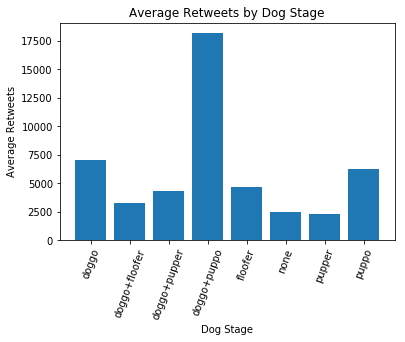

In [88]:
# Plot mean retweets for each dog stage

stage = ['none', 'pupper', 'doggo', 'puppo', 'doggo+pupper', 'floofer', 'doggo+puppo', 'doggo+floofer']

mean_retweets = [none['retweets'].mean(), pupper['retweets'].mean(), doggo['retweets'].mean(), puppo['retweets'].mean(),
                doggo_pupper['retweets'].mean(), floofer['retweets'].mean(), doggo_puppo['retweets'].mean(),
                doggo_floofer['retweets'].mean()]

plt.bar(x=stage, height=mean_retweets)

plt.title("Average Retweets by Dog Stage")
plt.xlabel("Dog Stage")
plt.ylabel("Average Retweets")
plt.xticks(rotation=70);

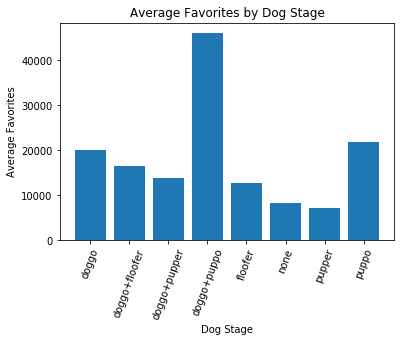

In [87]:
# Plot mean favorites for each dog stage
mean_favorites = [none['favorites'].mean(), pupper['favorites'].mean(), doggo['favorites'].mean(), puppo['favorites'].mean(),
                doggo_pupper['favorites'].mean(), floofer['favorites'].mean(), doggo_puppo['favorites'].mean(),
                doggo_floofer['favorites'].mean()]

plt.bar(x=stage, height=mean_favorites)

plt.title("Average Favorites by Dog Stage")
plt.xlabel("Dog Stage")
plt.ylabel("Average Favorites")
plt.xticks(rotation=70);

# Insights

In plotting dog stage against average retweets, the doggo+puppo combination generated the greatest number of retweets, followed by doggo, then puppo. The pupper stage appears the least popular; even the tweets with no stage indicated recieved a higher average number of retweets.

In plotting dog stage against average favorites, the doggo+puppo combination generated the greatest number of favorites, followed by puppo, then doggo. Again, the pupper stage appears the least popular; even the tweets with no stage indicated received a higher average number of favorites.

The overall most popular stage from the twitter page was the doggo+puppo combination, receiving the highest average number of both retweets and favorites. 